In [63]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Open the  memory file for reading
loaded_data= pd.read_csv('playing_memory_880.csv')
loaded_data

,episode,cart_position,cart_velocity,pole_angle,pole_angular_velocity,action,reward,new_cart_position,new_cart_velocity,new_pole_angle,new_pole_angular_velocity,q_values
0,0,0.013870,0.026208,0.027376,0.033123,1,1.0,0.014394,0.220927,0.028038,-0.250798,"[17.424397, 18.431095]"
1,0,0.014394,0.220927,0.028038,-0.250798,1,1.0,0.018813,0.415638,0.023022,-0.534507,"[17.785023, 18.40013]"
2,0,0.018813,0.415638,0.023022,-0.534507,0,1.0,0.027126,0.220200,0.012332,-0.234660,"[18.670609, 18.5435]"
3,0,0.027126,0.220200,0.012332,-0.234660,1,1.0,0.031530,0.415143,0.007639,-0.523427,"[17.776121, 18.367172]"
4,0,0.031530,0.415143,0.007639,-0.523427,0,1.0,0.039833,0.219915,-0.002830,-0.228347,"[18.685854, 18.484688]"
...,...,...,...,...,...,...,...,...,...,...,...,...
281026,879,-2.213496,-2.209000,-0.093698,1.570399,1,1.0,-2.257676,-2.012893,-0.062290,1.250021,"[15.553661, 16.088898]"
281027,879,-2.257676,-2.012893,-0.062290,1.250021,0,1.0,-2.297934,-2.207164,-0.037290,1.522561,"[15.931983, 15.726796]"
281028,879,-2.297934,-2.207164,-0.037290,1.522561,1,1.0,-2.342077,-2.011611,-0.006839,1.218476,"[15.423721, 16.090506]"
281029,879,-2.342077,-2.011611,-0.006839,1.218476,0,1.0,-2.382310,-2.206644,0.017531,1.509008,"[15.83497, 15.593561]"


In [64]:
loaded_data.shape

(281031, 12)

In [65]:
loaded_data.dtypes

episode                        int64
cart_position                float64
cart_velocity                float64
pole_angle                   float64
pole_angular_velocity        float64
action                         int64
reward                       float64
new_cart_position            float64
new_cart_velocity            float64
new_pole_angle               float64
new_pole_angular_velocity    float64
q_values                      object
dtype: object

In [66]:
loaded_data['action'].value_counts(dropna = False)

0    143900
1    137131
Name: action, dtype: int64

In [67]:
#max of episode length
loaded_data['episode'].value_counts()

404    362
248    362
66     360
28     359
271    359
      ... 
214    286
94     285
737    285
840    284
9      284
Name: episode, Length: 880, dtype: int64

# Data Preproceessing: state, action, q-value

In [68]:
#extract the number of q_value
import re

def extract_numeric_range(text):
    values = re.findall(r'\d+\.\d+', text)
    values = [float(value) for value in values]
    return values

# Apply the function to the column
loaded_data['q_values'] = loaded_data['q_values'].apply(extract_numeric_range)

In [69]:
#choose max q_values
loaded_data['max_qvalue'] = loaded_data['q_values'].apply(lambda x: max(x))
loaded_data

,episode,cart_position,cart_velocity,pole_angle,pole_angular_velocity,action,reward,new_cart_position,new_cart_velocity,new_pole_angle,new_pole_angular_velocity,q_values,max_qvalue
0,0,0.013870,0.026208,0.027376,0.033123,1,1.0,0.014394,0.220927,0.028038,-0.250798,"[17.424397, 18.431095]",18.431095
1,0,0.014394,0.220927,0.028038,-0.250798,1,1.0,0.018813,0.415638,0.023022,-0.534507,"[17.785023, 18.40013]",18.400130
2,0,0.018813,0.415638,0.023022,-0.534507,0,1.0,0.027126,0.220200,0.012332,-0.234660,"[18.670609, 18.5435]",18.670609
3,0,0.027126,0.220200,0.012332,-0.234660,1,1.0,0.031530,0.415143,0.007639,-0.523427,"[17.776121, 18.367172]",18.367172
4,0,0.031530,0.415143,0.007639,-0.523427,0,1.0,0.039833,0.219915,-0.002830,-0.228347,"[18.685854, 18.484688]",18.685854
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281026,879,-2.213496,-2.209000,-0.093698,1.570399,1,1.0,-2.257676,-2.012893,-0.062290,1.250021,"[15.553661, 16.088898]",16.088898
281027,879,-2.257676,-2.012893,-0.062290,1.250021,0,1.0,-2.297934,-2.207164,-0.037290,1.522561,"[15.931983, 15.726796]",15.931983
281028,879,-2.297934,-2.207164,-0.037290,1.522561,1,1.0,-2.342077,-2.011611,-0.006839,1.218476,"[15.423721, 16.090506]",16.090506
281029,879,-2.342077,-2.011611,-0.006839,1.218476,0,1.0,-2.382310,-2.206644,0.017531,1.509008,"[15.83497, 15.593561]",15.834970


In [70]:
#select col:state, action, q-value
data= loaded_data[['episode','cart_position','cart_velocity','pole_angle','pole_angular_velocity','action','max_qvalue']]
#data.head()

#one-hot encoding action column
data2 = pd.get_dummies(data,columns = ['action'])
data2.head()

,episode,cart_position,cart_velocity,pole_angle,pole_angular_velocity,max_qvalue,action_0,action_1
0,0,0.013870,0.026208,0.027376,0.033123,18.431095,0,1
1,0,0.014394,0.220927,0.028038,-0.250798,18.400130,0,1
2,0,0.018813,0.415638,0.023022,-0.534507,18.670609,1,0
3,0,0.027126,0.220200,0.012332,-0.234660,18.367172,0,1
4,0,0.031530,0.415143,0.007639,-0.523427,18.685854,1,0


In [71]:
data3 = data2.copy()
epi_lengths = data3['episode'].value_counts().reset_index(drop = False)
print(epi_lengths)
max_len = max(epi_lengths['episode'])
data4 = pd.DataFrame()
for index, episode in zip(epi_lengths['index'],epi_lengths['episode']):
  old = data3.loc[data3.episode == index]
  add_count = max_len-episode
  new = pd.DataFrame({
        'episode': [index for _ in range(add_count)],
        'cart_position':[0 for _ in range(add_count)],
        'cart_velocity':[0 for _ in range(add_count)],
        'pole_angle':[0 for _ in range(add_count)],
        'pole_angular_velocity':[0 for _ in range(add_count)],
        'max_qvalue':[0 for _ in range(add_count)],
        'action_0':[0 for _ in range(add_count)],
        'action_1':[0 for _ in range(add_count)]
        })
  data4 = pd.concat([data4, old, new], axis = 0)
data4.episode = data4.episode.astype('int')
data4 = data4.reset_index(drop = True)
data4.episode.value_counts()


     index  episode
0      404      362
1      248      362
2       66      360
3       28      359
4      271      359
..     ...      ...
875    214      286
876     94      285
877    737      285
878    840      284
879      9      284

[880 rows x 2 columns]


404    362
748    362
155    362
186    362
765    362
      ... 
325    362
309    362
746    362
544    362
9      362
Name: episode, Length: 880, dtype: int64

In [72]:
data4.loc[data4.episode == 101]

,episode,cart_position,cart_velocity,pole_angle,pole_angular_velocity,max_qvalue,action_0,action_1
259554,101,-0.031394,0.029205,-0.002105,-0.022075,18.523800,0.0,1.0
259555,101,-0.030810,0.224357,-0.002547,-0.315422,18.794863,0.0,1.0
259556,101,-0.026323,0.419515,-0.008855,-0.608907,19.351057,1.0,0.0
259557,101,-0.017933,0.224518,-0.021033,-0.319026,18.806597,1.0,0.0
259558,101,-0.013443,0.029701,-0.027414,-0.033050,18.700798,0.0,1.0
...,...,...,...,...,...,...,...,...
259911,101,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
259912,101,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
259913,101,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
259914,101,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [73]:
data4[data4.episode == 101].index

Int64Index([259554, 259555, 259556, 259557, 259558, 259559, 259560, 259561,
            259562, 259563,
            ...
            259906, 259907, 259908, 259909, 259910, 259911, 259912, 259913,
            259914, 259915],
           dtype='int64', length=362)

Train, test split

In [74]:
#train, test split
train_size = int(len(data4) * 0.8)
test_size = len(data4) - train_size
train, test = data4.iloc[0:train_size,:], data4.iloc[train_size:len(data4),:]

#x,y split
X_train = train.drop(['episode','max_qvalue'],axis=1)
y_train = train['max_qvalue']

X_test = test.drop(['episode','max_qvalue'],axis=1)
y_test = test['max_qvalue']

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(254848, 6)
(63712, 6)
(254848,)
(63712,)


In [75]:
train

,episode,cart_position,cart_velocity,pole_angle,pole_angular_velocity,max_qvalue,action_0,action_1
0,404,0.031895,0.029304,0.012384,-0.038582,18.656555,0.0,1.0
1,404,0.032481,0.224247,0.011612,-0.327332,18.708572,0.0,1.0
2,404,0.036966,0.419201,0.005065,-0.616331,19.105831,1.0,0.0
3,404,0.045350,0.224009,-0.007261,-0.322057,18.604610,0.0,1.0
4,404,0.049830,0.419234,-0.013703,-0.617021,19.067928,1.0,0.0
...,...,...,...,...,...,...,...,...
254843,799,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
254844,799,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
254845,799,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
254846,799,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [76]:
X_train

,cart_position,cart_velocity,pole_angle,pole_angular_velocity,action_0,action_1
0,0.031895,0.029304,0.012384,-0.038582,0.0,1.0
1,0.032481,0.224247,0.011612,-0.327332,0.0,1.0
2,0.036966,0.419201,0.005065,-0.616331,1.0,0.0
3,0.045350,0.224009,-0.007261,-0.322057,0.0,1.0
4,0.049830,0.419234,-0.013703,-0.617021,1.0,0.0
...,...,...,...,...,...,...
254843,0.000000,0.000000,0.000000,0.000000,0.0,0.0
254844,0.000000,0.000000,0.000000,0.000000,0.0,0.0
254845,0.000000,0.000000,0.000000,0.000000,0.0,0.0
254846,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [77]:
y_train

0         18.656555
1         18.708572
2         19.105831
3         18.604610
4         19.067928
            ...    
254843     0.000000
254844     0.000000
254845     0.000000
254846     0.000000
254847     0.000000
Name: max_qvalue, Length: 254848, dtype: float64

In [78]:
test

,episode,cart_position,cart_velocity,pole_angle,pole_angular_velocity,max_qvalue,action_0,action_1
254848,210,0.019856,-0.033107,-0.030852,-0.002017,18.668590,0.0,1.0
254849,210,0.019194,0.162443,-0.030892,-0.304273,18.944107,1.0,0.0
254850,210,0.022442,-0.032225,-0.036978,-0.021490,18.679056,0.0,1.0
254851,210,0.021798,0.163407,-0.037408,-0.325607,19.025797,1.0,0.0
254852,210,0.025066,-0.031163,-0.043920,-0.044952,18.671688,0.0,1.0
...,...,...,...,...,...,...,...,...
318555,9,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
318556,9,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
318557,9,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
318558,9,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [79]:
X_test

,cart_position,cart_velocity,pole_angle,pole_angular_velocity,action_0,action_1
254848,0.019856,-0.033107,-0.030852,-0.002017,0.0,1.0
254849,0.019194,0.162443,-0.030892,-0.304273,1.0,0.0
254850,0.022442,-0.032225,-0.036978,-0.021490,0.0,1.0
254851,0.021798,0.163407,-0.037408,-0.325607,1.0,0.0
254852,0.025066,-0.031163,-0.043920,-0.044952,0.0,1.0
...,...,...,...,...,...,...
318555,0.000000,0.000000,0.000000,0.000000,0.0,0.0
318556,0.000000,0.000000,0.000000,0.000000,0.0,0.0
318557,0.000000,0.000000,0.000000,0.000000,0.0,0.0
318558,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [80]:
y_test

254848    18.668590
254849    18.944107
254850    18.679056
254851    19.025797
254852    18.671688
            ...    
318555     0.000000
318556     0.000000
318557     0.000000
318558     0.000000
318559     0.000000
Name: max_qvalue, Length: 63712, dtype: float64

In [81]:
#change to numpy array
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

print(X_train[:10])
print(y_train[:10])

print(X_test[:10])
print(y_test[:10])

[[ 0.0318945   0.02930445  0.01238351 -0.03858187  0.          1.        ]
 [ 0.03248059  0.22424665  0.01161187 -0.32733208  0.          1.        ]
 [ 0.03696553  0.41920137  0.00506523 -0.6163306   1.          0.        ]
 [ 0.04534955  0.22400904 -0.00726138 -0.3220567   0.          1.        ]
 [ 0.04982974  0.41923362 -0.01370252 -0.6170207   1.          0.        ]
 [ 0.05821441  0.22430576 -0.02604293 -0.32868478  1.          0.        ]
 [ 0.06270052  0.02956405 -0.03261663 -0.04432702  0.          1.        ]
 [ 0.0632918   0.22513816 -0.03350316 -0.34711975  1.          0.        ]
 [ 0.06779457  0.03050837 -0.04044556 -0.06518698  0.          1.        ]
 [ 0.06840473  0.22618616 -0.0417493  -0.37035137  1.          0.        ]]
[18.656555 18.708572 19.105831 18.60461  19.067928 18.781473 18.646782
 18.912882 18.67745  19.028187]
[[ 0.01985567 -0.03310707 -0.03085214 -0.00201734  0.          1.        ]
 [ 0.01919352  0.16244344 -0.03089248 -0.30427262  1.          0.      

In [82]:
#length of each episode
max_len

#how many episode
episode=880
train_len = int(episode*0.8)
test_len = int(episode *0.2)

In [83]:
#reshape the data to lstm input data
X_train = X_train.reshape(train_len,max_len,6)
X_test = X_test.reshape(test_len,max_len,6)

y_train = y_train.reshape(train_len,max_len,1)
y_test = y_test.reshape(test_len,max_len,1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train[:10])
print(y_test[:10])

(704, 362, 6)
(176, 362, 6)
(704, 362, 1)
(176, 362, 1)
[[[ 0.0318945   0.02930445  0.01238351 -0.03858187  0.
    1.        ]
  [ 0.03248059  0.22424665  0.01161187 -0.32733208  0.
    1.        ]
  [ 0.03696553  0.41920137  0.00506523 -0.6163306   1.
    0.        ]
  ...
  [-2.3107555  -0.49616075 -0.18942547 -0.49055707  1.
    0.        ]
  [-2.3206787  -0.68817663 -0.19923662 -0.26304388  0.
    1.        ]
  [-2.3344421  -0.49085134 -0.20449749 -0.61136544  1.
    0.        ]]

 [[ 0.03900698  0.00850945  0.04323356 -0.04102369  0.
    1.        ]
  [ 0.03917716  0.20298563  0.04241309 -0.31975865  0.
    1.        ]
  [ 0.04323688  0.3974787   0.03601791 -0.5987702   1.
    0.        ]
  ...
  [-2.309102   -2.0519633  -0.13870178  1.2998313   1.
    0.        ]
  [-2.3501413  -2.2450793  -0.11270516  1.5460756   0.
    1.        ]
  [-2.395043   -2.0487986  -0.08178365  1.2204573   1.
    0.        ]]

 [[ 0.02645165 -0.01639529  0.03472066 -0.01764478  0.
    1.        ]
  [ 0

# Modeling


LSTM

In [84]:
import keras

from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers import Dropout
from keras.layers import Dense, Embedding, LSTM, Bidirectional,GRU, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D

from tensorflow.keras.regularizers import l1, l2


In [85]:
# Train the model with mini-batches
batch_size = 60
epochs = 30

In [86]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(32, input_shape=(max_len, 6), activation='relu'))
#model.add(Dense(32, activation='relu'))
#model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Dense(1))  # Output layer for Q-value prediction

# Compile the model
optimizer = keras.optimizers.Adam(lr=0.005)

model.compile(optimizer= optimizer, loss='mean_squared_error')

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 32)                4992      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5025 (19.63 KB)
Trainable params: 5025 (19.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
    shuffle=False, validation_data=(X_test, y_test))

Epoch 1/30
12/12 [==============================] - 4s 165ms/step - loss: 299.0336 - val_loss: 273.8214
Epoch 2/30
12/12 [==============================] - 2s 136ms/step - loss: 297.1925 - val_loss: 272.0068
Epoch 3/30
12/12 [==============================] - 2s 131ms/step - loss: 462.5762 - val_loss: 271.3526
Epoch 4/30
12/12 [==============================] - 2s 131ms/step - loss: 294.3699 - val_loss: 271.0581
Epoch 5/30
12/12 [==============================] - 2s 133ms/step - loss: 294.2859 - val_loss: 270.6881
Epoch 6/30
12/12 [==============================] - 2s 132ms/step - loss: 293.8596 - val_loss: 270.2932
Epoch 7/30
12/12 [==============================] - 2s 201ms/step - loss: 293.4708 - val_loss: 269.8891
Epoch 8/30
12/12 [==============================] - 2s 155ms/step - loss: 293.0154 - val_loss: 269.4802
Epoch 9/30
12/12 [==============================] - 2s 135ms/step - loss: 292.5594 - val_loss: 269.0683
Epoch 10/30
12/12 [==============================] - 2s 132ms/st

In [88]:
## Plotting results
def plot_loss(history):

    # Plot loss during training
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

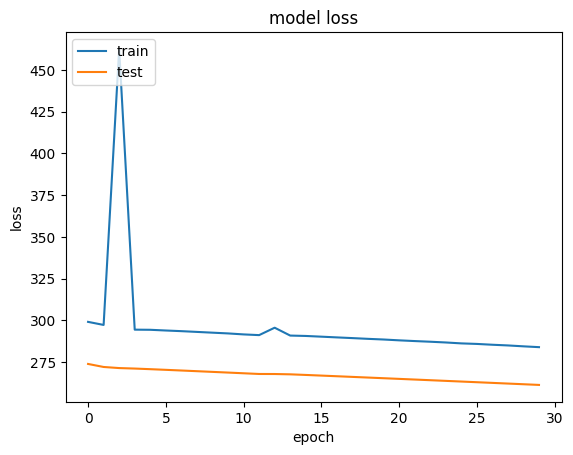

In [89]:
plot_loss(history)

GRU

In [90]:
# Train the model with mini-batches
batch_size_gru = 30
epochs_gru = 30

In [91]:
# Create GRU model
model_gru = Sequential()
model_gru.add(GRU(64, input_shape=(max_len,6), activation='relu'))
model_gru.add(Dropout(0.3))
model_gru.add(Dense(1))  # Output layer for Q-value prediction

# Compile the model
model_gru.compile(optimizer='adam', loss='mean_squared_error')


In [92]:
history_gru = model_gru.fit(X_train, y_train, batch_size=batch_size_gru, epochs=epochs_gru,
    shuffle=False, validation_data=(X_test, y_test))

Epoch 1/30
24/24 [==============================] - 6s 202ms/step - loss: 295.4272 - val_loss: 263.8392
Epoch 2/30
24/24 [==============================] - 3s 143ms/step - loss: 285.6576 - val_loss: 247.0084
Epoch 3/30
24/24 [==============================] - 3s 142ms/step - loss: 269.7926 - val_loss: 249.0450
Epoch 4/30
24/24 [==============================] - 4s 156ms/step - loss: 269.6666 - val_loss: 246.6025
Epoch 5/30
24/24 [==============================] - 4s 177ms/step - loss: 262.8117 - val_loss: 172.7131
Epoch 6/30
24/24 [==============================] - 3s 145ms/step - loss: 55.7211 - val_loss: 50.3350
Epoch 7/30
24/24 [==============================] - 3s 141ms/step - loss: 41.1769 - val_loss: 49.9562
Epoch 8/30
24/24 [==============================] - 5s 192ms/step - loss: 39.9195 - val_loss: 48.7122
Epoch 9/30
24/24 [==============================] - 3s 141ms/step - loss: 39.8126 - val_loss: 48.5732
Epoch 10/30
24/24 [==============================] - 3s 139ms/step - los

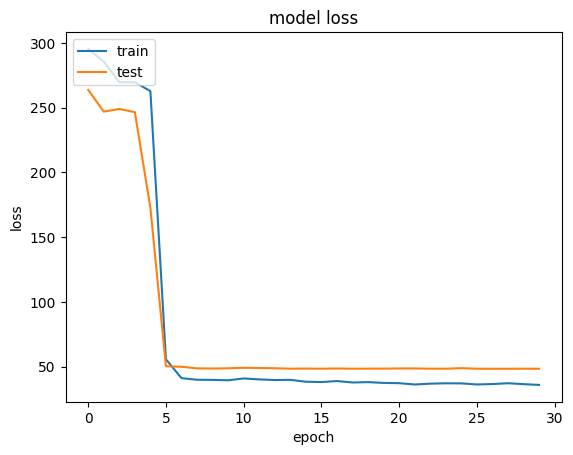

In [93]:
plot_loss(history_gru)

# Top100 data

Only select first 100 in each episode

In [45]:
grouped = loaded_data.groupby('episode')

# Initialize an empty DataFrame to store the selected records
data_select = pd.DataFrame()

# Iterate through each group (episode) and select the first 100 records
for _, group_df in grouped:
    data_select = data_select.append(group_df.head(100))

# Reset the index of the selected_records DataFrame
data_select.reset_index(drop=True, inplace=True)

<ipython-input-45-c4c9eb948a99>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_select = data_select.append(group_df.head(100))
<ipython-input-45-c4c9eb948a99>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_select = data_select.append(group_df.head(100))
<ipython-input-45-c4c9eb948a99>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_select = data_select.append(group_df.head(100))
<ipython-input-45-c4c9eb948a99>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_select = data_select.append(group_df.head(100))
<ipython-input-45-c4c9eb948a99>:8: FutureWarning: The frame.append method is deprecated and will be removed 

In [46]:
data_select

,episode,cart_position,cart_velocity,pole_angle,pole_angular_velocity,action,reward,new_cart_position,new_cart_velocity,new_pole_angle,new_pole_angular_velocity,q_values,max_qvalue
0,0,0.013870,0.026208,0.027376,0.033123,1,1.0,0.014394,0.220927,0.028038,-0.250798,"[17.424397, 18.431095]",18.431095
1,0,0.014394,0.220927,0.028038,-0.250798,1,1.0,0.018813,0.415638,0.023022,-0.534507,"[17.785023, 18.40013]",18.400130
2,0,0.018813,0.415638,0.023022,-0.534507,0,1.0,0.027126,0.220200,0.012332,-0.234660,"[18.670609, 18.5435]",18.670609
3,0,0.027126,0.220200,0.012332,-0.234660,1,1.0,0.031530,0.415143,0.007639,-0.523427,"[17.776121, 18.367172]",18.367172
4,0,0.031530,0.415143,0.007639,-0.523427,0,1.0,0.039833,0.219915,-0.002830,-0.228347,"[18.685854, 18.484688]",18.685854
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87995,879,-0.361888,-0.136773,0.030498,-0.024243,1,1.0,-0.364623,0.057898,0.030013,-0.307149,"[18.245941, 18.566952]",18.566952
87996,879,-0.364623,0.057898,0.030013,-0.307149,0,1.0,-0.363465,-0.137638,0.023870,-0.005154,"[18.562965, 18.526703]",18.562965
87997,879,-0.363465,-0.137638,0.023870,-0.005154,1,1.0,-0.366218,0.057133,0.023767,-0.290212,"[18.281494, 18.649141]",18.649141
87998,879,-0.366218,0.057133,0.023767,-0.290212,0,1.0,-0.365075,-0.138319,0.017962,0.009871,"[18.569508, 18.561829]",18.569508


In [47]:
data_select.loc[data_select.episode == 101]

,episode,cart_position,cart_velocity,pole_angle,pole_angular_velocity,action,reward,new_cart_position,new_cart_velocity,new_pole_angle,new_pole_angular_velocity,q_values,max_qvalue
10100,101,-0.031394,0.029205,-0.002105,-0.022075,1,1.0,-0.030810,0.224357,-0.002547,-0.315422,"[17.804419, 18.5238]",18.523800
10101,101,-0.030810,0.224357,-0.002547,-0.315422,1,1.0,-0.026323,0.419515,-0.008855,-0.608907,"[18.67112, 18.794863]",18.794863
10102,101,-0.026323,0.419515,-0.008855,-0.608907,0,1.0,-0.017933,0.224518,-0.021033,-0.319026,"[19.351057, 18.408138]",19.351057
10103,101,-0.017933,0.224518,-0.021033,-0.319026,0,1.0,-0.013443,0.029701,-0.027414,-0.033050,"[18.806597, 18.773901]",18.806597
10104,101,-0.013443,0.029701,-0.027414,-0.033050,1,1.0,-0.012848,0.225206,-0.028075,-0.334254,"[18.133427, 18.700798]",18.700798
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,101,-0.389472,-0.154725,0.012801,0.023717,1,1.0,-0.392566,0.040211,0.013275,-0.264900,"[18.37444, 18.725468]",18.725468
10196,101,-0.392566,0.040211,0.013275,-0.264900,0,1.0,-0.391762,-0.155098,0.007977,0.031940,"[18.619785, 18.604889]",18.619785
10197,101,-0.391762,-0.155098,0.007977,0.031940,1,1.0,-0.394864,0.039909,0.008616,-0.258215,"[18.407585, 18.738846]",18.738846
10198,101,-0.394864,0.039909,0.008616,-0.258215,0,1.0,-0.394066,-0.155335,0.003452,0.037173,"[18.640923, 18.617462]",18.640923


In [48]:
#select col:state, action, q-value
data_select= data_select[['episode','cart_position','cart_velocity','pole_angle','pole_angular_velocity','action','max_qvalue']]
#data.head()

#one-hot encoding action column
data5 = pd.get_dummies(data_select,columns = ['action'])
data5.head()

,episode,cart_position,cart_velocity,pole_angle,pole_angular_velocity,max_qvalue,action_0,action_1
0,0,0.013870,0.026208,0.027376,0.033123,18.431095,0,1
1,0,0.014394,0.220927,0.028038,-0.250798,18.400130,0,1
2,0,0.018813,0.415638,0.023022,-0.534507,18.670609,1,0
3,0,0.027126,0.220200,0.012332,-0.234660,18.367172,0,1
4,0,0.031530,0.415143,0.007639,-0.523427,18.685854,1,0


In [49]:
#train, test split
train_size = int(len(data5) * 0.8)
test_size = len(data5) - train_size
train_100, test_100 = data5.iloc[0:train_size,:], data5.iloc[train_size:len(data5),:]

#x,y split
X_train_100 = train_100.drop(['episode','max_qvalue'],axis=1)
y_train_100 = train_100['max_qvalue']

X_test_100 = test_100.drop(['episode','max_qvalue'],axis=1)
y_test_100 = test_100['max_qvalue']

print(X_train_100.shape)
print(X_test_100.shape)
print(y_train_100.shape)
print(y_test_100.shape)

(70400, 6)
(17600, 6)
(70400,)
(17600,)


In [50]:
#change to numpy array
X_train_100 = X_train_100.to_numpy()
X_test_100 = X_test_100.to_numpy()
y_train_100 = y_train_100.to_numpy()
y_test_100 = y_test_100.to_numpy()


In [51]:
max_len=100
train_len= 704
test_len= 176

#reshape the data to lstm input data
X_train_100 = X_train_100.reshape(train_len,max_len,6)
X_test_100 = X_test_100.reshape(test_len,max_len,6)

y_train_100 = y_train_100.reshape(train_len,max_len,1)
y_test_100 = y_test_100.reshape(test_len,max_len,1)

print(X_train_100.shape)
print(X_test_100.shape)
print(y_train_100.shape)
print(y_test_100.shape)
print(X_train_100[:10])
print(y_train_100[:10])
print(y_test_100[:10])

(704, 100, 6)
(176, 100, 6)
(704, 100, 1)
(176, 100, 1)
[[[ 0.01387023  0.02620832  0.02737576  0.03312345  0.
    1.        ]
  [ 0.0143944   0.22092721  0.02803823 -0.250798    0.
    1.        ]
  [ 0.01881295  0.4156378   0.02302227 -0.5345069   1.
    0.        ]
  ...
  [-0.32623756 -0.53898054  0.0507858   0.46657145  0.
    1.        ]
  [-0.33701718 -0.34461156  0.06011723  0.19031847  0.
    1.        ]
  [-0.3439094  -0.15039888  0.0639236  -0.08281048  0.
    1.        ]]

 [[ 0.0161149  -0.01396318 -0.00487397 -0.02109026  0.
    1.        ]
  [ 0.01583564  0.18122832 -0.00529578 -0.315307    0.
    1.        ]
  [ 0.0194602   0.37642533 -0.01160192 -0.6096553   1.
    0.        ]
  ...
  [-0.38411695  0.19049528  0.00187538 -0.51976097  1.
    0.        ]
  [-0.38030702 -0.00465301 -0.00851984 -0.22648767  0.
    1.        ]
  [-0.3804001   0.19058965 -0.01304959 -0.5218458   1.
    0.        ]]

 [[ 0.02889758 -0.03930586 -0.04809161 -0.00220633  0.
    1.        ]
  [ 0

LSTM

In [52]:
# Train the model with mini-batches
batch_size_1 = 100
epochs_1 = 30

In [53]:
# Create the LSTM model
model_1 = Sequential()
model_1.add(LSTM(30, input_shape=(max_len, 6)))
model_1.add(Dense(32))

model_1.add(Dense(1))  # Output layer for Q-value prediction

# Compile the model
model_1.compile(optimizer='adam', loss='mean_squared_error')

model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30)                4440      
                                                                 
 dense_4 (Dense)             (None, 32)                992       
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5465 (21.35 KB)
Trainable params: 5465 (21.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
history_1 = model_1.fit(X_train_100, y_train_100, batch_size=batch_size_1, epochs=epochs_1,
    shuffle=False, validation_data=(X_test_100, y_test_100))

Epoch 1/30
8/8 [==============================] - 4s 128ms/step - loss: 333.5538 - val_loss: 321.6454
Epoch 2/30
8/8 [==============================] - 0s 51ms/step - loss: 312.1284 - val_loss: 290.5674
Epoch 3/30
8/8 [==============================] - 0s 48ms/step - loss: 270.3966 - val_loss: 230.1218
Epoch 4/30
8/8 [==============================] - 0s 47ms/step - loss: 204.0920 - val_loss: 161.3602
Epoch 5/30
8/8 [==============================] - 0s 52ms/step - loss: 138.0033 - val_loss: 101.2501
Epoch 6/30
8/8 [==============================] - 0s 47ms/step - loss: 81.3984 - val_loss: 50.6099
Epoch 7/30
8/8 [==============================] - 0s 48ms/step - loss: 35.7775 - val_loss: 15.4415
Epoch 8/30
8/8 [==============================] - 0s 48ms/step - loss: 8.4628 - val_loss: 1.2312
Epoch 9/30
8/8 [==============================] - 0s 47ms/step - loss: 0.3963 - val_loss: 0.5336
Epoch 10/30
8/8 [==============================] - 0s 48ms/step - loss: 1.0073 - val_loss: 1.4321
Epoc

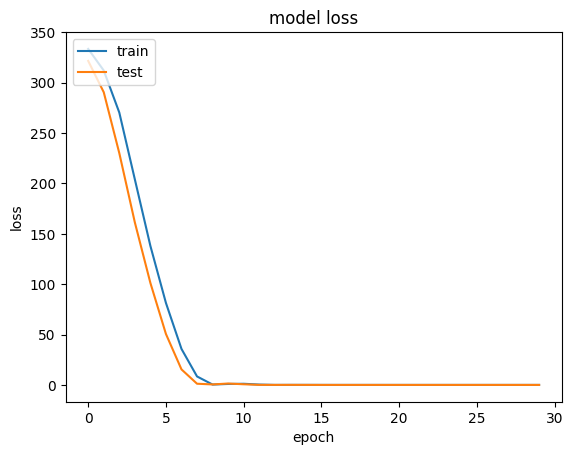

In [55]:
plot_loss(history_1)

GRU

In [56]:
# Train the model with mini-batches
batch_size_gru = 10
epochs_gru = 30

In [57]:
# Create GRU model
model_gru_1 = Sequential()
model_gru_1.add(GRU(64, input_shape=(max_len,6), activation='relu'))
model_gru_1.add(Dropout(0.3))
model_gru_1.add(Dense(1))  # Output layer for Q-value prediction

# Compile the model
model_gru_1.compile(optimizer='adam', loss='mean_squared_error')


In [58]:
history_gru1 = model_gru_1.fit(X_train_100, y_train_100, batch_size=batch_size_gru, epochs=epochs_gru,
    shuffle=False, validation_data=(X_test_100, y_test_100))

Epoch 1/30
71/71 [==============================] - 6s 61ms/step - loss: 162.6106 - val_loss: 1.3619
Epoch 2/30
71/71 [==============================] - 3s 42ms/step - loss: 7.4981 - val_loss: 1.0933
Epoch 3/30
71/71 [==============================] - 3s 41ms/step - loss: 6.5339 - val_loss: 0.5305
Epoch 4/30
71/71 [==============================] - 3s 45ms/step - loss: 6.5903 - val_loss: 1.3627
Epoch 5/30
71/71 [==============================] - 4s 55ms/step - loss: 5.8564 - val_loss: 0.7877
Epoch 6/30
71/71 [==============================] - 3s 42ms/step - loss: 4.9693 - val_loss: 0.8088
Epoch 7/30
71/71 [==============================] - 3s 42ms/step - loss: 4.7883 - val_loss: 0.2770
Epoch 8/30
71/71 [==============================] - 3s 45ms/step - loss: 5.2034 - val_loss: 0.5383
Epoch 9/30
71/71 [==============================] - 5s 70ms/step - loss: 5.1297 - val_loss: 0.0547
Epoch 10/30
71/71 [==============================] - 3s 42ms/step - loss: 5.1147 - val_loss: 0.4095
Epoch 1

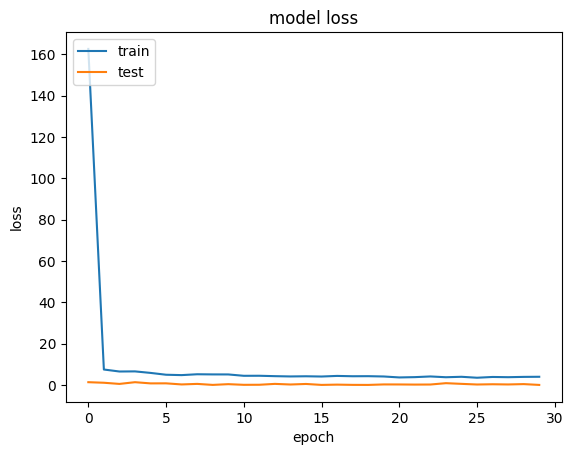

In [59]:
plot_loss(history_gru1)